<a href="https://colab.research.google.com/github/ValGrace/ml-and-ds-datasets-/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [110]:
# importing csv file which is a Petrol dataset then storing the data in a dataframe   
url = 'https://raw.githubusercontent.com/ValGrace/ml-and-ds-datasets-/main/train.csv'
dataset = pd.read_csv(url)


In [111]:
X = dataset.iloc[:, 17:18].values
y = dataset.iloc[:, -1].values
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
X

array([[7],
       [6],
       [7],
       ...,
       [7],
       [5],
       [5]])

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=0) 

In [114]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
y_prediction = linear.predict(X_test)

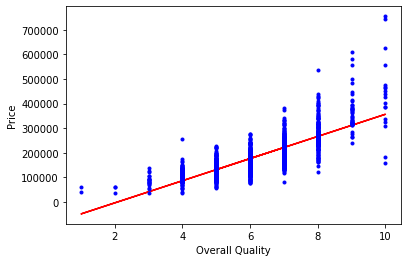

In [116]:
#plt.scatter(X_train, y_train, color='red') 
plt.plot(X_train, linear.predict(X_train), color='red')
plt.plot(X, y, '.b')
plt.xlabel('Overall Quality')
plt.ylabel('Price')
plt.show()

In [119]:
# Applying polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score 

polyn = PolynomialFeatures(degree=4, include_bias=True)
x_train_transform = polyn.fit_transform(X_train)
x_test_transform = polyn.transform(X_test)

#including the bias parameter
linear = LinearRegression(fit_intercept=True)
linear.fit(x_train_transform, y_train)
y_predict = linear.predict(x_test_transform)
values = ({'Current Price': y_test, 'Predicted Price': y_predict})
df = pd.DataFrame(values)
df

,Current Price,Predicted Price
0,200624,162347.906115
1,133000,162347.906115
2,110000,130909.349870
3,192000,210502.333066
4,88000,162347.906115
5,85000,130909.349870
6,282922,275597.380152
7,141000,162347.906115
8,745000,435533.878404
9,148800,210502.333066


In [121]:
print(linear.intercept_)
print(linear.coef_)

-91053.95727545221
[     0.         138715.69886169 -38279.54595893   4798.58994601
   -183.12045031]


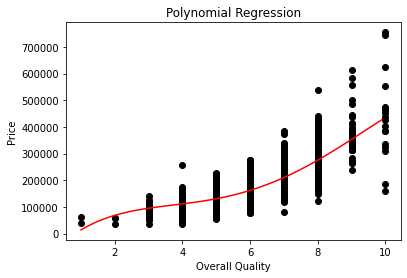

In [124]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
y_grid = linear.predict(polyn.fit_transform(X_grid))
plt.scatter(X, y, color = 'black')
plt.plot(X_grid, y_grid, color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Overall Quality')
plt.ylabel('Price')
plt.show()